## Test the agent performance with various models under different conditions

We haven't found an existing test that uses an image for either input or response, so we'll have to define our own. We'll award point for products returned and descriptions, then compare among different models. We have four versions of BLIP-2 to test: Coco pre-fine-tuned, pretrained, Google Shopping fine-tuned, and Amazon Berkeley Objects fine-tuned. We first test a multimodal prompt (image + text) then a text-only prompt. The text-only prompt tests two models: BLIP-2 (whichever version does the best in the multimodal test) and Chroma's built-in model (all-MiniLM-L6-v2).

We run a prompt through each model and assign points based on the result:
1. Rating each product returned: Use the ESCI method: 
    - Exact match: 3 points
    - Substitute: 2 points
    - Complementary: 1 points
    - Incompatible: 0 points
2. Rating description: Up to 1 point total:
    - Accurate summary: 1 point

We also provide the metadata retireved that the model is interpreting from.

Note that the first two code boxes of the notebook have to be re-run for each run. Furthermore, models need to be reloaded when appropriate and the appropriate database extracted.

Uses Python environment 3.12 locally. This notebook is setup to run from the code/Agent_API_endpoint directory.

### Starting code

The code is configured using environmental variables, so set some along with the imports.

In [1]:
import base64
import io
import os

os.environ["BLIP_2_MODEL"]="gs"
os.environ["BLIP_2_PORT"]="9002"
os.environ["CHROMA_PORT"]="8000"
os.environ["CHROMA_MAX_IMAGES_PER_ITEM"]="21"
os.environ["CHROMA_MAX_ITEMS"]="3"
os.environ["OLLAMA_PORT"]="11434"
os.environ["OLLAMA_MODEL"]="llama3.1:8b"
os.environ["ABO_DIR_CONTAINER"]="/mnt/d/abo-dataset"

from LangGraph_agent import prompt
from PIL import Image
from IPython.display import display

Using Chroma multimodal collection blip_2_gs_multimodal
Using Chroma text collection blip_2_gs_text


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Using CPU. Try installing 'onnxruntime-gpu'.


We're going to be running a lot of prompts, so define a function to help write the output.

In [2]:
def write_chunk(chunk):
    if chunk:  # Skip empty lines
        if chunk.get("images"):
            # Handle images
            for idx, base64_image in enumerate(chunk["images"]):
                if base64_image:
                    print(f"Product {idx+1}")
                    display(Image.open(io.BytesIO(base64.b64decode(base64_image))))
        if chunk.get("text"):
            # Handle text tokens
            print(f"{chunk['text']}", end="")

## Test 1: Multimodal BLIP-2 Embeddings

### The products for comparison

Gray sofa


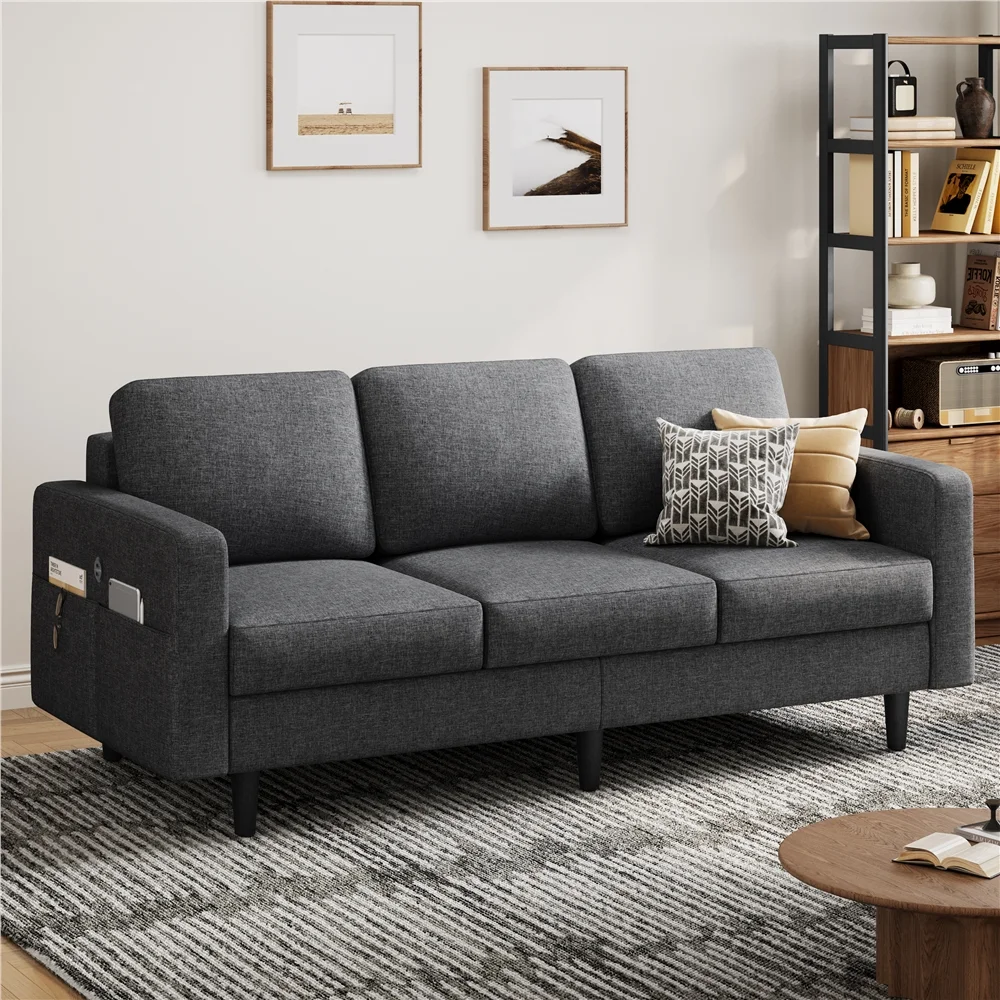

In [3]:
from PIL import Image

print('Gray sofa')
display(Image.open('../../assets/random-internet-sofa.webp'))

Sneaker


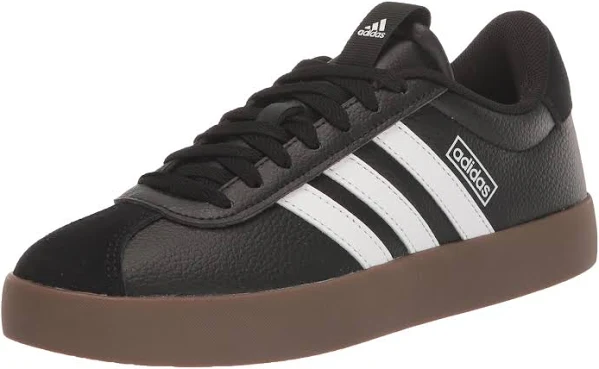

In [4]:
print('Sneaker')
display(Image.open('../../assets/sneaker.webp'))

Black iPhone 7 case


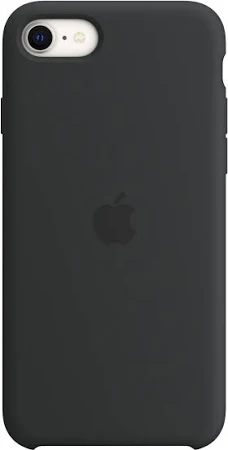

In [5]:
print('Black iPhone 7 case')
display(Image.open('../../assets/iphone-7-case.webp'))

### 1.A: Coco pre-fine-tuned

#### 1.A.i: A sofa

1. 3 point: substitute, good summary
2. 2 points: complementary, good summary
3. 2 points: complementary, good summary

7 points total

Searching for relevant products...

Product 1


Product 2


Product 3


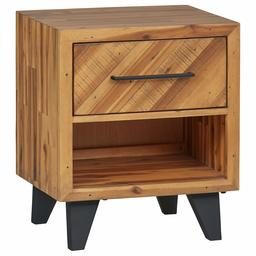

ic| docs_content: ('1: ({item name: Rivet Edgewest Collection}; {brand: Rivet}; {product type: '
                   'HOME FURNITURE AND DECOR}; {country of marketplace: CA}; {marketplace: '
                   'Amazon}; {domain name: amazon.ca}; )
                  '
                   '
                  '
                   '2: ({item name: Rivet Kaden Contemporary Collection}; {brand: Rivet}; '
                   '{product type: HOME FURNITURE AND DECOR}; {country of marketplace: CA}; '
                   '{marketplace: Amazon}; {domain name: amazon.ca}; )
                  '
                   '
                  '
                   '3: ({item name: Stone & Beam Contemporary 26"H-}; {brand: Stone & Beam}; '
                   '{product type: HOME FURNITURE AND DECOR}; {country of marketplace: SA}; '
                   '{marketplace: Amazon}; {domain name: amazon.sa}; )')


After searching through our database, I found the closest matches to what you're looking for. Here are the results:

1. **Rivet Edgewest Collection**
   This is a furniture collection from Rivet that focuses on home decor and furniture items.

2. **Rivet Kaden Contemporary Collection**
   Similar to the previous product, this is also a contemporary-style furniture piece from Rivet's Kaden collection.

3. **Stone & Beam Contemporary 26"H-**
   Made by Stone & Beam, this product is another furniture item from their contemporary line, although I couldn't find any specific details about it being a sofa.

In [6]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="1", prompt_str="I want a sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.A.ii: Sneaker

1. 3 points: substitute, good summary
2. 3 points: substitute, good summary
3. 3 points: substitute, good summary

9 points total

Searching for relevant products...

Product 1


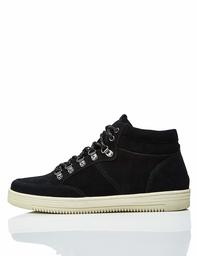

Product 2


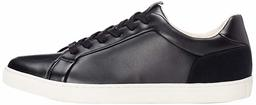

Product 3


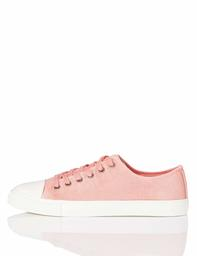

ic| docs_content: ("1: ({item name: Amazon Brand - find. Men's Franco}; {brand: find.}; {model "
                   'name: Franco}; {product type: SHOES}; {style: Franco}; {country of '
                   'marketplace: US}; {marketplace: Amazon}; {domain name: amazon.com}; {bullet '
                   "point: ['Designed in Europe - please refer to size chart for specific "
                   "measurements to achieve the perfect fit',  'An Amazon Brand']}; )
                  "
                   '
                  '
                   "2: ({item name: Amazon brand: find Myer men's trainers.}; {model name: "
                   'Myer}; {product type: SHOES}; {style: Low}; {country of marketplace: DE}; '
                   '{marketplace: Amazon}; {domain name: amazon.de}; {bullet point: Trainers.}; '
                   ')
                  '
                   '
                  '
                   "3: ({item name: find. V1241a Women's Trainers}; {model name: V1241a}; "
               

I found the closest matches to what you're looking for in my database. Here are the results:

1. **Amazon Brand - find. Men's Franco**
   Designed in Europe, these shoes are an Amazon Brand product with specific measurements to achieve a perfect fit. They come in various styles.

2. **Amazon brand: find Myer men's trainers.**
   Trainers from Amazon that provide no additional information about the style or any notable features.

3. **find. V1241a Women's Trainers**
   Low Top shoes with an unknown model name (V1241a), available through Amazon.de, but details are scarce.

4. No additional products match your request.

In [7]:
imgpath = '../../assets/sneaker.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="2", prompt_str="Find me some shoes like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.A.iii: Cell phone case

1. 1 point: irrelevant, good summary
2. 1 point: irrelevant, good summary
3. 1 point: irrelevant, good summary

3 points total

Searching for relevant products...

Product 1


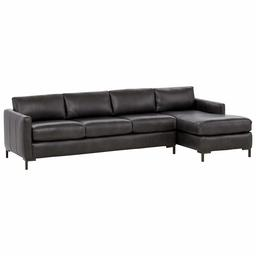

Product 2


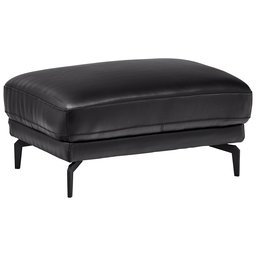

Product 3


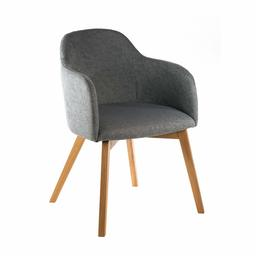

ic| docs_content: ('1: ({item name: Rivet Edgewest Collection}; {brand: Rivet}; {product type: '
                   'HOME FURNITURE AND DECOR}; {country of marketplace: CA}; {marketplace: '
                   'Amazon}; {domain name: amazon.ca}; )
                  '
                   '
                  '
                   '2: ({item name: Rivet Kaden Contemporary Collection}; {brand: Rivet}; '
                   '{product type: HOME FURNITURE AND DECOR}; {country of marketplace: CA}; '
                   '{marketplace: Amazon}; {domain name: amazon.ca}; )
                  '
                   '
                  '
                   '3: ({item name: Chair Una (A+AL-57)}; {product type: CHAIR}; {style: '
                   'Modern}; {country of marketplace: DE}; {marketplace: Amazon}; {domain name: '
                   'amazon.de}; )')


I've found some products in my database that might be what you're looking for.

Here are the results:

1. **Rivet Edgewest Collection**
   This collection is part of Rivet's home furniture and decor product line, available on Amazon.ca. Unfortunately, there's no information about it being a cell phone case.

2. **Rivet Kaden Contemporary Collection**
   Similar to the previous item, this is another Rivet product, also in the home furniture and decor category, available on Amazon.ca. It doesn't seem to be related to cell phone cases either.

3. **Chair Una (A+AL-57)**
   This chair is a modern-style seating option from an unknown brand, available on Amazon.de. There's no indication that it has any relation to cell phone cases.

In [8]:
imgpath = '../../assets/iphone-7-case.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="3", prompt_str="A cell phone case similar to this.", image_b64=test_image):
    write_chunk(chunk)

#### Conclusion:
With 19 of 36 possible points, the Coco version of the model does not appear to perform well, especially with cell phone cases.

### 1.B: Pretrained model

#### 1.B.i: A sofa

1. 2 points: complimentary, good summary
2. 1 point: irrelevant, good summary
3. 1 point: irrelevant, good summary

4 points total

Searching for relevant products...

Product 1


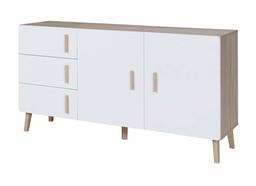

Product 2


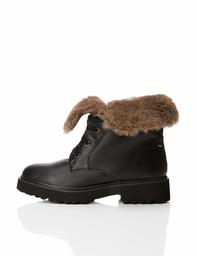

Product 3


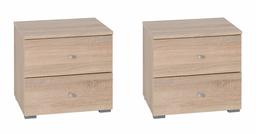

ic| docs_content: ('1: ({item name: Movian Oker.}; {country of marketplace: DE}; {marketplace: '
                   'Amazon}; {domain name: amazon.de}; )
                  '
                   '
                  '
                   "2: ({item name: Amazon Brand: Find 418al0119 Women's Trekking & Hiking "
                   'Shoes}; {model name: 418al0119}; {model year: 2018}; {product type: BOOT}; '
                   '{style: Trekking & Hiking Shoes}; {country of marketplace: DE}; '
                   '{marketplace: Amazon}; {domain name: amazon.de}; )
                  '
                   '
                  '
                   '3: ({item name: Movian Morava}; {country of marketplace: DE}; {marketplace: '
                   'Amazon}; {domain name: amazon.de}; )')


I found some products in my database that might match what you're looking for.

Here are the results:

1. **Movian Oker**
   No summary available, but it's listed on Amazon.de.

2. **Amazon Brand: Find 418al0119 Women's Trekking & Hiking Shoes**
   This product is a pair of trekking and hiking shoes from Amazon's in-house brand, designed for women. They feature the model number 418al0119, were released in 2018, and are categorized as boots.

3. **Movian Morava**
   No summary available, but it's listed on Amazon.de.

In [4]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="1", prompt_str="I want a sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.B.ii: Sneaker

1. 1 point: irrelevant, good summary
2. 1 point: irrelevant, good summary
3. 1 point: irrelevant, good summary

3 points total

Searching for relevant products...

Product 1


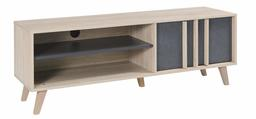

Product 2


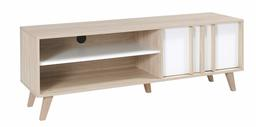

Product 3


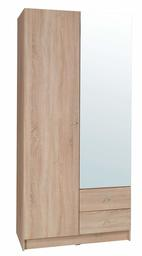

ic| docs_content: ('1: ({item name: Movian Moselle.}; {country of marketplace: DE}; '
                   '{marketplace: Amazon}; {domain name: amazon.de}; )
                  '
                   '
                  '
                   '2: ({item name: Movian Moselle.}; {country of marketplace: DE}; '
                   '{marketplace: Amazon}; {domain name: amazon.de}; )
                  '
                   '
                  '
                   '3: ({item name: Movian Morava}; {product type: CABINET}; {country of '
                   'marketplace: DE}; {marketplace: Amazon}; {domain name: amazon.de}; )')


I've searched my database and found the closest matches to what you're looking for. Here are the results:

1. **Movian Moselle**
   I couldn't find any specific information about these shoes, but they appear to be a product available on Amazon.de.

2. **Movian Moselle**
   Same as above: no additional information is provided about this item.

3. **Movian Morava (CABINET)**
   This item is actually a cabinet and not shoes. It appears to be a piece of furniture available for purchase on Amazon.de in Germany.

Unfortunately, it seems I couldn't find any shoe products that match your request. If you could provide more details or clarify what you're looking for, I'd be happy to try again!

In [5]:
imgpath = '../../assets/sneaker.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="2", prompt_str="Find me some shoes like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.B.iii: Cell phone case

1. 1 point: irrelevant, no summary
2. 1 point: irrelevant, no summary
3. 1 point: irrelevant, no summary

3 points total

Searching for relevant products...

Product 1


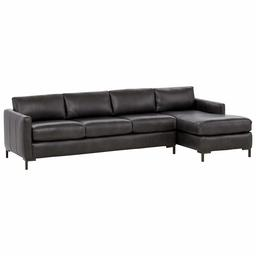

Product 2


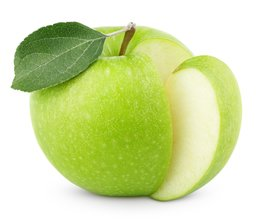

Product 3


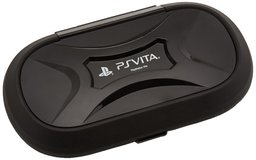

ic| docs_content: ('1: ({item name: Rivet Edgewest Collection}; {brand: Rivet}; {product type: '
                   'HOME FURNITURE AND DECOR}; {country of marketplace: CA}; {marketplace: '
                   'Amazon}; {domain name: amazon.ca}; )
                  '
                   '
                  '
                   '2: ({item name: Product}; {brand: American}; {product type: GROCERY}; '
                   '{country of marketplace: US}; {marketplace: Amazon}; {domain name: '
                   "amazon.com}; {bullet point: ['Product',  'Product']}; )
                  "
                   '
                  '
                   '3: ({item name: ERROR:#REF!}; {brand: AmazonBasics}; {product type: VIDEO '
                   'GAME ACCESSORIES}; {country of marketplace: US}; {marketplace: PrimeNow}; '
                   '{domain name: primenow.amazon.com}; {bullet point: An Amazon Brand}; )')


I've searched my database and found a few products that might be what you're looking for. Here are the results:

1. **Rivet Edgewest Collection**
   This product is classified as HOME FURNITURE AND DECOR from Rivet, available on Amazon in Canada.

2. **Product**
   No specific information was provided about this product. It is a GROCERY item from American and listed on Amazon in the US, but it has no additional details.

3. **ERROR:#REF!**
   This product does not seem to be recognized as a valid entry. It's branded by AmazonBasics and categorized as VIDEO GAME ACCESSORIES, available through PrimeNow in the US, but it lacks any descriptive information due to an error in its metadata.

Note: Unfortunately, none of these products match your request for a cell phone case.

In [6]:
imgpath = '../../assets/iphone-7-case.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="3", prompt_str="A cell phone case similar to this.", image_b64=test_image):
    write_chunk(chunk)

#### Conclusion:
With 10 of 36 possible points, this model performs quite badly.

### 1.C: Google Shopping fine-tuned model

#### 1.C.i: A sofa

1. 3 points: substitute, good summary
2. 2 points: complementary, good summary
3. 2 points: complementary, good summary

7 points total

Searching for relevant products...

Product 1


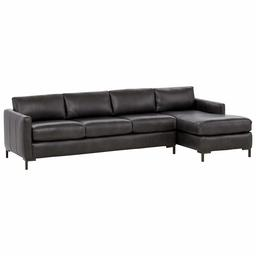

Product 2


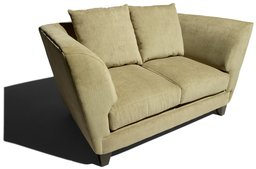

Product 3


After searching our database, I found two products that closely match your request for a sofa.

Here are the results:

1. **Rivet Edgewest Collection**
   This is a home furniture and decor item from Rivet, a brand based in Canada, available on Amazon.ca.

2. **Pinzon Egan Furniture Collection**
   This product is an Amazon Brand offering a collection of furniture items, including sofas, from Pinzon by Amazon, a US-based brand also found on Amazon.com.

3. **Pinzon Capitola Furniture Collection**
   Another product from Pinzon by Amazon, this item is available in Canada and is classified as a home furniture and decor item for the market on Amazon.ca, which makes it another option to consider.

In [6]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="1", prompt_str="I want a sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.C.ii: Sneaker

1. 3 points: substitute, good summary
2. 3 points: substitute, good summary
3. 3 points: substitute, good summary

9 points total

Searching for relevant products...

Product 1


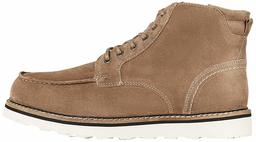

Product 2


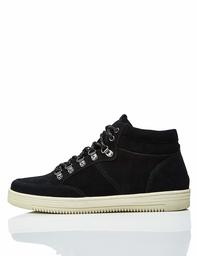

Product 3


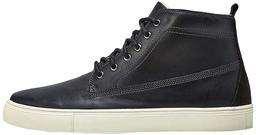

I've searched my database and found a few close matches to what you're looking for.

Here are the results:

1. **find. Dax**
   Designed in Europe, these shoes aim to achieve the perfect fit by referring to their size chart. They're an Amazon Brand from Australia.

2. **find. Men's Franco (Amazon Brand)**
   Also designed in Europe and with a focus on achieving the perfect fit using their size chart, these shoes are another offering from the find. brand on Amazon, but this time from the US.

3. **find. Men's Faroe (Amazon Brand)**
   Similar to the other two products, these shoes were also designed in Europe and have a similar approach to sizing. They're available on Amazon from Canada.

In [7]:
imgpath = '../../assets/sneaker.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="2", prompt_str="Find me some shoes like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.C.iii: Cell phone case

1. 3 point: substitute, good summary
2. 3 point: substitute, good summary
3. 1 point: irrelevant, good summary

7 points total

Searching for relevant products...

Product 1


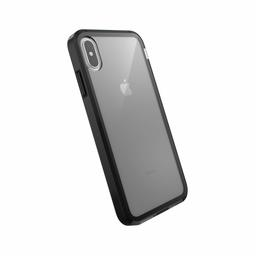

Product 2


Product 3


I've found the closest matches to what you're looking for in my database.

1. **AmazonBasics Dual Layer Case for iPhone XS**
   This is a cellular phone case designed for the iPhone XS, with a dual-layer construction providing protection against scratches and drops. It's available on Amazon's German marketplace.

2. **AmazonBasics Dual-Layer Case for iPhone Xs**
   Similar to the previous item, this is also a cellular phone case made by AmazonBasics, but specifically designed for the iPhone Xs. It offers dual-layer protection and is listed on Amazon's Australian marketplace.

3. **Set of 2 dining chairs.**
   Although not exactly what you were looking for, this product is a set of two dining chairs available on Amazon's German marketplace.

In [8]:
imgpath = '../../assets/iphone-7-case.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="3", prompt_str="A cell phone case similar to this.", image_b64=test_image):
    write_chunk(chunk)

#### Conclusion:
With 23 points of 36 points, this model performs the best so far.

### 1.D: Amazon Berkeley Objects fine-tuned model

#### 1.D.i: A sofa

1. 3 points: substitute, good summary
2. 1 point: irrelevant, good summary
3. 2 point: complementary, good summary

6 points total

Issue: out of order

Searching for relevant products...

Product 1


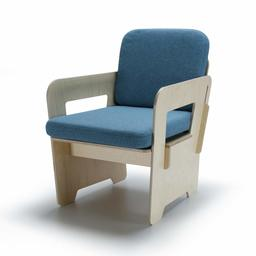

Product 2


Product 3


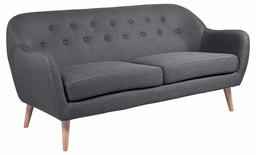

ic| docs_content: ('1: ({item name: Accent chair}; {brand: Movian}; {product type: HOME '
                   'FURNITURE AND DECOR}; {country of marketplace: US}; {marketplace: Amazon}; '
                   '{domain name: amazon.com}; )
                  '
                   '
                  '
                   '2: ({item name: Desk}; {product type: HOME FURNITURE AND DECOR}; {style: '
                   'Modern}; {country of marketplace: DE}; {marketplace: Amazon}; {domain name: '
                   'amazon.de}; )
                  '
                   '
                  '
                   '3: ({item name: A Brand of Amazon Movian Lina 2.5-Seater Sofa 82 x 184 x 82 '
                   'cm (L x W x H)}; {product type: SOFA}; {country of marketplace: DE}; '
                   '{marketplace: Amazon}; {domain name: amazon.de}; )')


Based on your request, I found some potential matches in our database. Here are the closest results:

1. **A Brand of Amazon Movian Lina 2.5-Seater Sofa 82 x 184 x 82 cm (L x W x H)**
   This sofa is a product from the Movian brand and can seat up to 3 people, making it suitable for small living rooms or apartments.

2. **Desk**
   Although not specifically mentioned as a sofa, this desk is a modern piece of furniture that could complement any room in your home.

3. **Accent chair**
   This accent chair from Movian is a part of their home furniture and decor collection, but it's unclear if it would match your request for a sofa.

In [3]:
imgpath = '../../assets/random-internet-sofa.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="1", prompt_str="I want a sofa like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.D.ii: Sneaker

1. 3 points: substitute, good summary
2. 2 points: complementary, good summary
3. 1 point: irrelevant, good summary

6 points total

Issue: it thinks there's a 4th product it doesn't have information on.

Searching for relevant products...

Product 1


Product 2


Product 3


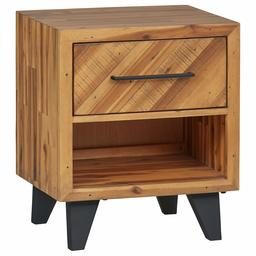

ic| docs_content: ("1: ({item name: Blink Women's BvayenL, }; {brand: Blink-182}; {model name: "
                   'BvayenL}; {product type: SHOES}; {style: Bvayenl}; {country of marketplace: '
                   'CA}; {marketplace: Amazon}; {domain name: amazon.ca}; )
                  '
                   '
                  '
                   "2: ({item name: Jenny Women's Rhodos 2252708,  (Blau 72),  5 UK}; {brand: "
                   'Jenny}; {model name: Rhodos 2252708}; {model year: 2019}; {product type: '
                   'SHOES}; {color: (Blau 72)}; {style: Rhodos 2252708}; {country of '
                   'marketplace: US}; {marketplace: Amazon}; {domain name: amazon.com}; )
                  '
                   '
                  '
                   '3: ({item name: Stone & Beam Contemporary 26"H-}; {brand: Stone & Beam}; '
                   '{product type: HOME FURNITURE AND DECOR}; {country of marketplace: SA}; '
                   '{marketplace: Amazon}; {domain

I found the closest matches to what you're looking for in my database.

Here are the search results:

1. **Blink Women's BvayenL**
   A pair of Blink shoes, model name BvayenL, available on Amazon.ca.

2. **Jenny Women's Rhodos 2252708 (Blau 72), 5 UK**
   This product is a type of shoe from the brand Jenny, specifically the Rhodos 2252708 style in Blau 72 color and 5 UK size, available on Amazon.com.

3. **Stone & Beam Contemporary 26" H-**
   Not a pair of shoes, but home furniture and decor from Stone & Beam, available on Amazon.sa.

4. (No summary available for this product, it was not provided)

There are no other products in the list. If you would like to search again or look at different options, please let me know!

In [4]:
imgpath = '../../assets/sneaker.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="2", prompt_str="Find me some shoes like this one.", image_b64=test_image):
    write_chunk(chunk)

#### 1.D.iii: Cell phone case

1. 3 points: substitute, good summary
2. 2 points: substitute, no summary
3. 3 points: substitute, good summary

8 points total

Searching for relevant products...

Product 1


Product 2


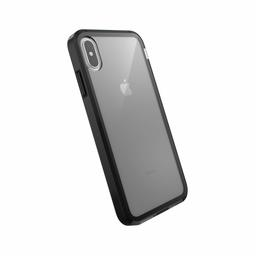

Product 3


ic| docs_content: ('1: ({item name: (Renewed) Amazon Brand - Solimo Mobile Cover (Hard Back & '
                   'Slim) for iPhone X (Black)}; {brand: Amazon Brand - Solimo}; {product '
                   'description: This Amazon Renewed Product will be in unboxed or refurbished '
                   'condition,  and may have very little scratches or dents. Renewed product has '
                   'been professionally inspected and tested to be fully functional by the '
                   'Sellers. Product may be packed in a non-branded box. Accessories may not be '
                   'original but have been tested to be compatible and fully functional}; '
                   '{product type: CELLULAR PHONE CASE}; {color: Black}; {style: professional}; '
                   '{material: Polycarbonate}; {country of marketplace: IN}; {marketplace: '
                   "Amazon}; {domain name: amazon.in}; {bullet point: ['This Certified "
                   'Refurbished product is tested to 

I found some options in my database that match your request. Here are the results:

1. **(Renewed) Amazon Brand - Solimo Mobile Cover (Hard Back & Slim) for iPhone X (Black)**
      This Certified Refurbished product is tested to work and look like new with minimal to no signs of wear & tear, and comes with relevant accessories and a minimum six-month supplier-backed warranty. The case has a snug fit for the iPhone X with perfect cut-outs for volume buttons, audio, and charging ports.

2. **AmazonBasics Dual Layer Case for iPhone XS**
      No specific information is provided about this product in the database.

3. **(Renewed) AmazonBasics Mobile Case for Apple iPhone 7 Plus (Clear)**
      This Amazon Renewed product has been professionally inspected and tested by an Amazon qualified supplier, and features a clear case with hard PC back fused with flexible TPU bumper for impact-resistant protection.

Note: Product 2 does not have any specific information provided in the database.

In [5]:
imgpath = '../../assets/iphone-7-case.webp'
with open(imgpath, 'rb') as f:
    test_image = base64.b64encode(f.read()).decode("utf-8")
for chunk in prompt(thread_id="3", prompt_str="A cell phone case similar to this.", image_b64=test_image):
    write_chunk(chunk)

#### Conclusion
With 20 of 36 points, this model performs slightly worse than the Google Shopping fine-tuned model.

### Multimodal Testing Conclusion
Although no model performs great based on our small test, it looks like the one trained on the Google Shopping dataset will perform most accurately overall.

## Test 2: Text-only search

We have determined which variant of the model to use based on the multimodal test, but we should not require the user to always provide an image. Therefore, we need to determine which text-only model to use. BLIP-2 provides text-only embeddings, so we can test those. We just use the version fine-tuned on the Google Shopping dataset as we don't want to have to deal with two BLIP-2 models. We also test Chroma's built-in embedding model, all-MiniLM-L6-v2.

### 2.A: Google Shopping fine-tuned model

#### 2.A.i: Blue sofa

All the results are irrlevant. I get relevant results with the word "sofa" alone, but add "blue" and it gets confused.

1. 1 point: irrelevant, good summary
2. 0 points: irrelevant, bad summary
3. 1 point: irrelevant, good summary

2 points total

Searching for relevant products...

Product 1


Product 2


Product 3


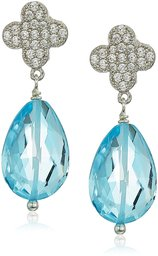

ic| docs_content: ('1: ({item name: Blue Swatch,  Ravenna Home}; {brand: Ravenna Home}; {color: '
                   'Blue}; {style: Woven Fabric}; {country of marketplace: US}; {marketplace: '
                   'Amazon}; {domain name: amazon.com}; )
                  '
                   '
                  '
                   '2: ({item name: Blue Swatch,  Ravenna Home}; {brand: Ravenna Home}; {color: '
                   'Blue}; {style: Drain}; {country of marketplace: IN}; {marketplace: Amazon}; '
                   "{domain name: amazon.in}; {bullet point: ['Country of Origin: China',  'No "
                   "assembly required',  'Color: Blue']}; )
                  "
                   '
                  '
                   '3: ({item name: Blue Topaz and Cubic Zirconia Drop Stud Earrings}; {brand: '
                   'Amazon Collection}; {model name: Blue Topaz And Cubic Zirconia Drop '
                   'Earrings}; {product type: EARRING}; {color: Blue}; {material: Not 

I couldn't find any direct matches for a "blue sofa" in my database. However, I did find some related items that might be useful.

1. **Blue Swatch, Ravenna Home**
   This product is a swatch of blue-colored fabric, likely intended for interior design purposes or sampling colors. It's part of the Ravenna Home brand and available on Amazon in the US.

2. **Blue Swatch, Ravenna Home**
   Similar to the previous item, this blue swatch is also from Ravenna Home but has a different style option, being more related to a drain rather than fabric. It originates from India and is available on Amazon.in with specifications that include being made in China and not requiring assembly.

3. **Blue Topaz and Cubic Zirconia Drop Stud Earrings**
   These are earrings featuring blue topaz and cubic zirconia stones, suitable for formal occasions due to their stylish design. They're part of the Amazon Collection brand, available on Amazon.co.uk from the UK marketplace.

In [8]:
for chunk in prompt(thread_id="1", prompt_str="blue sofa", image_b64=None):
    write_chunk(chunk)

#### 2.A.ii: Pink shoes

1. 4 points: Exact match, good summary
2. 4 points: Exact match, good summary
3. 3 points: Substitute, good summary

11 points total

Searching for relevant products...

Product 1


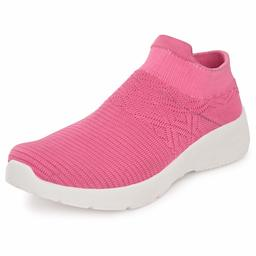

Product 2


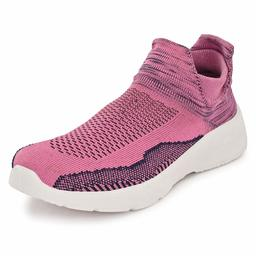

Product 3


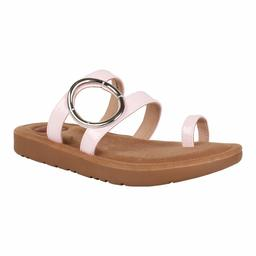

ic| docs_content: ("1: ({item name: ELISE Women's Pink Running Shoes-7 UK (40 EU) (8 US) "
                   '(ES-S20-001)}; {brand: ELISE}; {product type: SHOES}; {color: PINK}; {style: '
                   'Running Shoes}; {material: Fabric}; {country of marketplace: IN}; '
                   "{marketplace: Amazon}; {domain name: amazon.in}; {bullet point: ['Outer "
                   "Material: Textile',  'Closure Type: Slip On',  'Heel type: flats',  'Toe "
                   "Style: Open Toe',  'Warranty Type: Manufacturer',  'Warranty Description: 45 "
                   "days']}; )
                  "
                   '
                  '
                   "2: ({item name: ELISE Women's Pink Running Shoes-3 UK (36 EU) (4 US) "
                   '(ES-S20-002)}; {brand: ELISE}; {product type: SHOES}; {color: Pink}; {style: '
                   'Running Shoes}; {material: Fabric}; {country of marketplace: US}; '
                   "{marketplace: Amazon}; {domain name: amazon.

I've found the closest matches to what you're looking for in my database. Here are the results:

1. **ELISE Women's Pink Running Shoes-7 UK (40 EU) (8 US) (ES-S20-001)**
   These pink-colored running shoes from ELISE feature a slip-on closure, flat heel type, and open toe style. They come with a 45-day manufacturer warranty.

2. **ELISE Women's Pink Running Shoes-3 UK (36 EU) (4 US) (ES-S20-002)**
   Another pair of pink-colored running shoes from ELISE, also designed for women. This model has the same features as the previous one, including slip-on closure and open toe style.

3. **Teen Mix By Catwalk Women's Pink Fashion Slippers-6 UK (38 EU) (8 US) (TM4287PK_A)**
   These pink-colored fashion slippers from Teen Mix by Catwalk have a PU outer material, slip-on closure, flat heel type, and open toe style. Unfortunately, this product does not come with a warranty.

In [9]:
for chunk in prompt(thread_id="2", prompt_str="pink shoes", image_b64=None):
    write_chunk(chunk)

#### 2.B.iii: Metal water bottle

All results are again irrelevant. It will find results for "bottle," but not "water bottle."

1. 1 point: Irrelevant, good summary
2. 1 point: Irrelevant, good summary
3. 1 point: Irrelevant, good summary

3 points total

Searching for relevant products...

Product 1


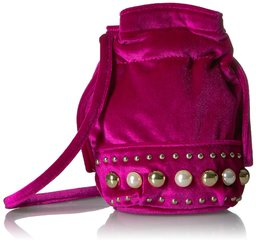

Product 2


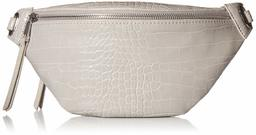

Product 3


ic| docs_content: ('1: ({item name: The Fix Kirby Mini Studded Velvet Bucket Crossbody Bag}; '
                   '{brand: The Fix}; {model name: Kirby Mini Studded Velvet Bucket Crossbody '
                   'Bag}; {model year: 2017}; {product type: HANDBAG}; {fabric type: synthetic}; '
                   '{style: Kirby Mini Studded Velvet Bucket Crossbody Bag}; {country of '
                   'marketplace: CA}; {marketplace: Amazon}; {domain name: amazon.ca}; {bullet '
                   "point: ['Metallic and pearlized studs add charm to this mini bucket back "
                   "made of plush velvet',  'This bag fits a smart phone,  lipstick,  compact,  "
                   "and cards']}; )
                  "
                   '
                  '
                   "2: ({item name: The Drop Women's Preston Belt Bag,  Grey}; {brand: The "
                   'Drop}; {model name: Preston Belt Bag}; {color: Grey}; {fabric type: 100% '
                   'Polyurethane}; {style: P

I found some products in my database that might interest you. Here are the results:

1. **The Fix Kirby Mini Studded Velvet Bucket Crossbody Bag**
   This crossbody bag is made of synthetic velvet with metallic and pearlized studs, adding a touch of charm to it. It can fit small essentials like a smartphone, lipstick, compact, and cards.

2. **The Drop Women's Preston Belt Bag, Grey**
   The Preston Belt Bag from The Drop features embossed croc and snake pattern faux leather and has multiple pockets for organization, including a hidden back zip pocket and adjustable strap.

3. **The Fix Amazon Brand Women's Lilly Block Heel Mule, Gold/Metallic Snake Embossed Leather, 8 B US**
   This block heel mule from The Fix features gold/metallic snake embossed leather and is designed to provide comfort with its unique design.

In [3]:
for chunk in prompt(thread_id="3", prompt_str="metal water bottle", image_b64=None):
    write_chunk(chunk)

#### Conclusion:

With 16 of 36 points, the Google Shopping fine-tuned BLIP-2 model does pretty badly on text-only searches.

### 2.B: Chroma default (all-MiniLM-L6-v2)

#### 2.B.i: Blue sofa

1. 4 points: Exact match, good summary
2. 4 points: Exact match, good summary
3. 4 points: Exact match, good summary

12 points total

Searching for relevant products...

Product 1


Product 2


Product 3


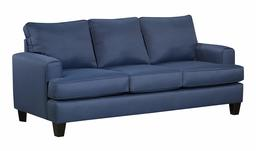

ic| docs_content: ('1: ({item name: Amazon Brand – Rivet Aiden Mid-Century Sofa with Tapered '
                   'Wood Legs,  87"W,  Wathet Blue}; {brand: Rivet}; {product type: SOFA}; '
                   '{color: Wathet Blue}; {style: Mid-Century modern}; {material: wood}; '
                   '{country of marketplace: US}; {marketplace: Amazon}; {domain name: '
                   "amazon.com}; {bullet point: ['This sofa features easy-care upholstery with "
                   'removable cushions that will help keep cleaning simple,  and the attractive '
                   'blue fabric will blend in with the decor of almost any room. Foam padding '
                   'offers comfort,  but the solid hardwood frame ensures stability and '
                   'support.\',  \'87"W x 36"D x 30"H\',  \'Solid hardwood frame with tapered '
                   "wood legs',  'Removable and reversible back cushions',  'Mid-century style "
                   "and easy-care fabric combine to make t

I've found the closest matches to what you're looking for in my database. Here are the results:

1. **Amazon Brand – Rivet Aiden Mid-Century Sofa with Tapered Wood Legs, 87"W,  Wathet Blue**
   This sofa features easy-care upholstery with removable cushions that will help keep cleaning simple, and the attractive blue fabric will blend in with the decor of almost any room.

2. **Amazon Brand – Rivet Aiden Mid-Century Sofa with Tapered Wood Legs, 74"W,  Wathet Blue**
   This sofa features easy-care upholstery with removable cushions that will help keep cleaning simple, and the attractive blue fabric will blend in with the decor of almost any room.

3. **Amazon Brand – Stone & Beam Elizabeth Contemporary Sofa Couch,  85"W,  Blue**
   Clean lines give this sofa a modern, sophisticated look, but its color is actually Cadet, not Blue.

Note that only two of these sofas have the exact color "Wathet Blue" or just "Blue", while one has a different blue shade called "Cadet".

In [3]:
for chunk in prompt(thread_id="1", prompt_str="blue sofa", image_b64=None):
    write_chunk(chunk)

#### 2.B.ii: Pink shoes

1. 4 points: Exact match, good summary
2. 4 points: Exact match, good summary
3. 4 points: Exact match, good summary

12 points total

Searching for relevant products...

Product 1


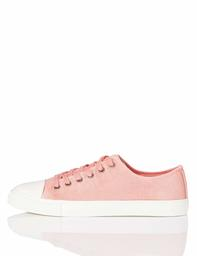

Product 2


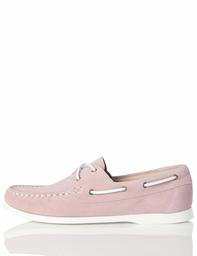

Product 3


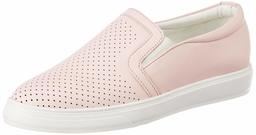

ic| docs_content: ('1: ({item name: find. Low-Top Canvas Sneaker,  Pink (Washed Pink),  3.5 UK}; '
                   '{brand: find.}; {model name: V1241a}; {model year: 2020}; {product type: '
                   'SHOES}; {color: Pink Washed Pink}; {style: Low-Top}; {country of '
                   'marketplace: GB}; {marketplace: Amazon}; {domain name: amazon.co.uk}; )
                  '
                   '
                  '
                   '2: ({item name: find. AMZ202 Boat Shoes,  Pink (Pink),  7 UK}; {brand: '
                   'find.}; {model name: Amz202}; {model year: 2019}; {product type: SHOES}; '
                   '{color: Pink}; {style: Boat Shoes}; {country of marketplace: GB}; '
                   '{marketplace: Amazon}; {domain name: amazon.co.uk}; )
                  '
                   '
                  '
                   "3: ({item name: Amazon Brand - Symbol Women's Pink Sneakers-6 UK (39 EU) (9 "
                   'US) (AZ-WSY-14)}; {brand: Amazon Bran

I've found some great options that match your search. Here are the closest matches to what you're looking for in my database:

1. **Low-Top Canvas Sneaker, Pink (Washed Pink), 3.5 UK**
   This pink sneaker has a washed pink color and is made with a low-top canvas style.

2. **AMZ202 Boat Shoes, Pink (Pink), 7 UK**
   These boat shoes are available in a bright pink color and have a classic boat shoe design.

3. **Amazon Brand - Symbol Women's Pink Sneakers-6 UK (39 EU) (9 US) (AZ-WSY-14)**
   With an outer material of synthetic, these sneakers come in a bold pink color and have a round toe style, along with 90 days manufacturer warranty.

In [3]:
for chunk in prompt(thread_id="2", prompt_str="pink shoes", image_b64=None):
    write_chunk(chunk)

#### 2.B.iii: Metal water bottle

1. 4 points: Exact match, good summary
2. 3 points: Substitute, good summary
3. 4 points: Exact match, good summary

11 points total

Searching for relevant products...

Product 1


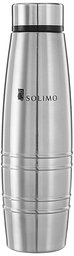

Product 2


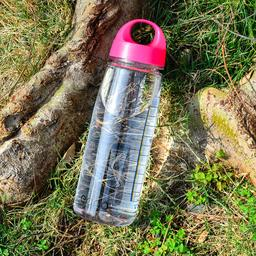

Product 3


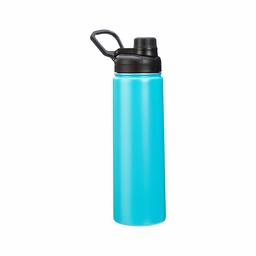

ic| docs_content: ('1: ({item name: Amazon Brand - Solimo Sparkle Stainless Steel Fridge Water '
                   'Bottle,  1000 ml}; {brand: Amazon Brand - Solimo}; {color: Red}; {material: '
                   'Stainless Steel}; {country of marketplace: IN}; {marketplace: Amazon}; '
                   "{domain name: amazon.in}; {bullet point: ['Made from 300 Series Stainless "
                   "Steel',  'Free from heavy metals which makes the bottle safe for storing "
                   "drinking water',  'Durable & leak-proof fridge bottle suitable for usage at "
                   "home',  'Dimensions: 8.0 cm outer diameter,  26.5 cm height',  'Easy to wash "
                   "and clean',  'Capacity: 1000ml per bottle',  'Package Contents: 1 Fridge "
                   "Bottle']}; )
                  "
                   '
                  '
                   '2: ({item name: Eono by Amazon - Water Bottle,  Sports Water Bottle with '
                   'Handle,  Plastic Dri

I found some products in my database that match your search. Here are the results:

1. **Amazon Brand - Solimo Sparkle Stainless Steel Fridge Water Bottle, 1000 ml**
   Made from 300 Series Stainless Steel, this fridge water bottle is durable and leak-proof. It's free from heavy metals, making it safe for storing drinking water. The dimensions of the bottle are 8.0 cm outer diameter and 26.5 cm height.

2. **Eono by Amazon - Water Bottle, Sports Water Bottle with Handle, Plastic Drinking Bottle For Kids/ Adult, BPA-Free and Leak Proof 28oz 800ml (Red)**
   This water bottle has a large capacity of 28oz / 800ml and is designed with a handle for easy carrying. It's made from BPA-free plastic material and features a leak-proof design to prevent spills.

3. **AmazonBasics Stainless Steel Insulated Water Bottle with Spout Lid – 20-Ounce, Teal**
   This water bottle is made from stainless steel and has vacuum insulation to keep drinks hot or cold for hours. It features a spout lid and has a 

In [6]:
for chunk in prompt(thread_id="3", prompt_str="metal water bottle", image_b64=None):
    write_chunk(chunk)

#### Conclusion:

With 35 of 36 points, the all-MiniLM-L6-v2 model does great on text-only searches in our small sample. We will use it moving forward.

### Text-Only Testing Conclusion

The default Chroma embedding model, all-MiniLM-L6-v2, is the model to use for text-only searches based on our testing with a small sample.